# Plots for the GALAH DR4 Paper

Author: Sven Buder (ANU, sven.buder@anu.edu.au)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-Catalogues" data-toc-modified-id="Read-in-Catalogues-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in Catalogues</a></span></li><li><span><a href="#Target-Information" data-toc-modified-id="Target-Information-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Target Information</a></span><ul class="toc-item"><li><span><a href="#Gaia-DR3-parallaxes-and-RVs" data-toc-modified-id="Gaia-DR3-parallaxes-and-RVs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Gaia DR3 parallaxes and RVs</a></span></li><li><span><a href="#How-many-Open-Cluster?" data-toc-modified-id="How-many-Open-Cluster?-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>How many Open Cluster?</a></span></li><li><span><a href="#How-many-Globular-Cluster?" data-toc-modified-id="How-many-Globular-Cluster?-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>How many Globular Cluster?</a></span></li><li><span><a href="#How-many-large-survey-targets?" data-toc-modified-id="How-many-large-survey-targets?-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>How many large survey targets?</a></span></li><li><span><a href="#Skymap" data-toc-modified-id="Skymap-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Skymap</a></span></li><li><span><a href="#SNR-distribution-and-change-wrt.-DR3" data-toc-modified-id="SNR-distribution-and-change-wrt.-DR3-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>SNR distribution and change wrt. DR3</a></span></li></ul></li><li><span><a href="#Spectrum-analysis" data-toc-modified-id="Spectrum-analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Spectrum analysis</a></span></li><li><span><a href="#Flag_SP" data-toc-modified-id="Flag_SP-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Flag_SP</a></span></li><li><span><a href="#Zero-Point-shifts" data-toc-modified-id="Zero-Point-shifts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Zero Point shifts</a></span></li><li><span><a href="#Dynamic-overview" data-toc-modified-id="Dynamic-overview-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dynamic overview</a></span></li></ul></div>

In [192]:
try:
    %matplotlib inline
    %config InlineBackend.figure_format='retina'
except:
    pass

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from astropy.table import Table, join
from astropy import units as u
from astropy.coordinates import SkyCoord, ICRS
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import matplotlib.patches as mpatches

import corner

## Read in Catalogues

In [4]:
# GALAH DR4 allstar and allspec
galah_dr4_allstar = Table.read('../catalogs/galah_dr4_allstar.fits')
galah_dr4_allspec = Table.read('../catalogs/galah_dr4_allspec.fits')

In [7]:
# GALAH DR3 allstar for reference
galah_dr3_allstar = Table.read('/Users/buder/GALAH_DR3/catalogs/GALAH_DR3_main_allstar_v2.fits')

In [8]:
# Open and Globular Cluster membership catalogues
ocs = Table.read('../auxiliary_information/CantatGaudin_2020_AandA_640_1.fits')
gcs = Table.read('../auxiliary_information/VasilievBaumgardt_2021_MNRAS_505_5978_cluster_source_id_memberprob0p7.fits')

# prepare joining with common keys
ocs['gaiadr3_source_id'] = ocs['GaiaDR2']
gcs['gaiadr3_source_id'] = gcs['source_id']

# join
ocs_dr4 = join(ocs, galah_dr4_allstar, keys = 'gaiadr3_source_id')
gcs_dr4 = join(gcs, galah_dr4_allstar, keys = 'gaiadr3_source_id')

## Target Information

### Gaia DR3 parallaxes and RVs

In [170]:
# astrometric information from Gaia DR3?
dr4_allstar_with_parallax = len(galah_dr4_allstar['gaiadr3_source_id'][np.isfinite(galah_dr4_allstar['parallax'])])
print('Stars with Gaia DR3 parallaxes: ', dr4_allstar_with_parallax, np.round(100*dr4_allstar_with_parallax/len(galah_dr4_allstar['parallax'])))

# Average parallax uncertainty?
parallax_perc = np.nanpercentile(np.array(100*galah_dr4_allstar['parallax_error']/galah_dr4_allstar['parallax']),q=[16,50,84])
print('Parallax uncertainty: r$'+str(np.round(parallax_perc[1],1))+'_{-'+str(np.round(parallax_perc[1]-parallax_perc[0],1))+'}^{+'+str(np.round(parallax_perc[2]-parallax_perc[1],1))+'}$')

# RVs from Gaia DR3?
dr4_allstar_with_gaia_rv = len(galah_dr4_allstar['gaiadr3_source_id'][np.isfinite(galah_dr4_allstar['rv_gaia_dr3'])])
print('Stars with Gaia DR3 RVs: ', dr4_allstar_with_gaia_rv, np.round(100*dr4_allstar_with_gaia_rv/len(galah_dr4_allstar['parallax'])))

Stars with Gaia DR3 parallaxes:  911754 99.0
Stars with Gaia DR3 RVs:  849867 93.0
Parallax uncertainty: r$1.6_{-0.9}^{+2.6}$


### How many Open Cluster?

In [14]:
nr_clusters = len(np.unique(ocs_dr4['Cluster']))
nr_clusters_above_5members = 0

for unique_oc in np.unique(ocs_dr4['Cluster']):
    match = len(np.where(unique_oc == ocs_dr4['Cluster'])[0])
    if match >= 5:
        nr_clusters_above_5members +=  1
    
print('OCs: '+str(nr_clusters)+' ('+str(nr_clusters_above_5members)+' with 5+ members)')

print('OC members in total: '+str(len(ocs_dr4['sobject_id'])))

OCs: 361 (109 with 5+ members)
OC members in total: 3756


### How many Globular Cluster?

In [15]:
nr_clusters = len(np.unique(gcs_dr4['cluster']))
nr_clusters_above_5members = 0

for unique_gc in np.unique(gcs_dr4['cluster']):
    match = len(np.where(unique_gc == gcs_dr4['cluster'])[0])
    if match >= 5:
        nr_clusters_above_5members +=  1
    
print('GCs: '+str(nr_clusters)+' ('+str(nr_clusters_above_5members)+' with 5+ members)')

print('GC members in total: '+str(len(gcs_dr4['sobject_id'])))

GCs: 30 (23 with 5+ members)
GC members in total: 2509


### How many large survey targets?

In [22]:
total_targets = len(galah_dr4_allstar['sobject_id'])

for survey in [
    'galah_bright',
    'galah_main',
    'galah_faint',
    'galah_phase2',
    'k2_hermes',
    'tess_hermes',
    'globular clusters',
    'open clusters',
    'commissioning',
    'others'
]:
    
    if survey == 'globular clusters':
        target_number = len(gcs_dr4['sobject_id']) # matched with Vasiliev and Baumgardt (2021) members
        total_targets -= target_number
    elif survey == 'open clusters':
        target_number = len(ocs_dr4['sobject_id']) # matched with Cantat-Gaudin et al. (2020) members
        total_targets -= target_number
    elif survey == 'commissioning':
        target_number = 2625
        total_targets -= target_number
    else:
        if survey == 'others':
            target_number = total_targets # the remaining targets
        else:
            target_number = len(np.where(galah_dr4_allstar['survey_name'] == survey)[0])
            total_targets -= target_number
    
    print(survey, target_number)

galah_bright 67680
galah_main 434901
galah_faint 33907
galah_phase2 172494
k2_hermes 117736
tess_hermes 37129
globular clusters 2509
open clusters 3756
commissioning 2625
others 44851


### Skymap

In [25]:
# Put ra/dec coordinates into SkyCoord and to l/b
coordinates = SkyCoord(frame=ICRS, ra=galah_dr4_allstar['ra']*u.deg, dec=galah_dr4_allstar['dec']*u.deg)
galah_dr4_l = coordinates.galactic.l.wrap_at(180 * u.deg).radian
galah_dr4_b = coordinates.galactic.b.radian

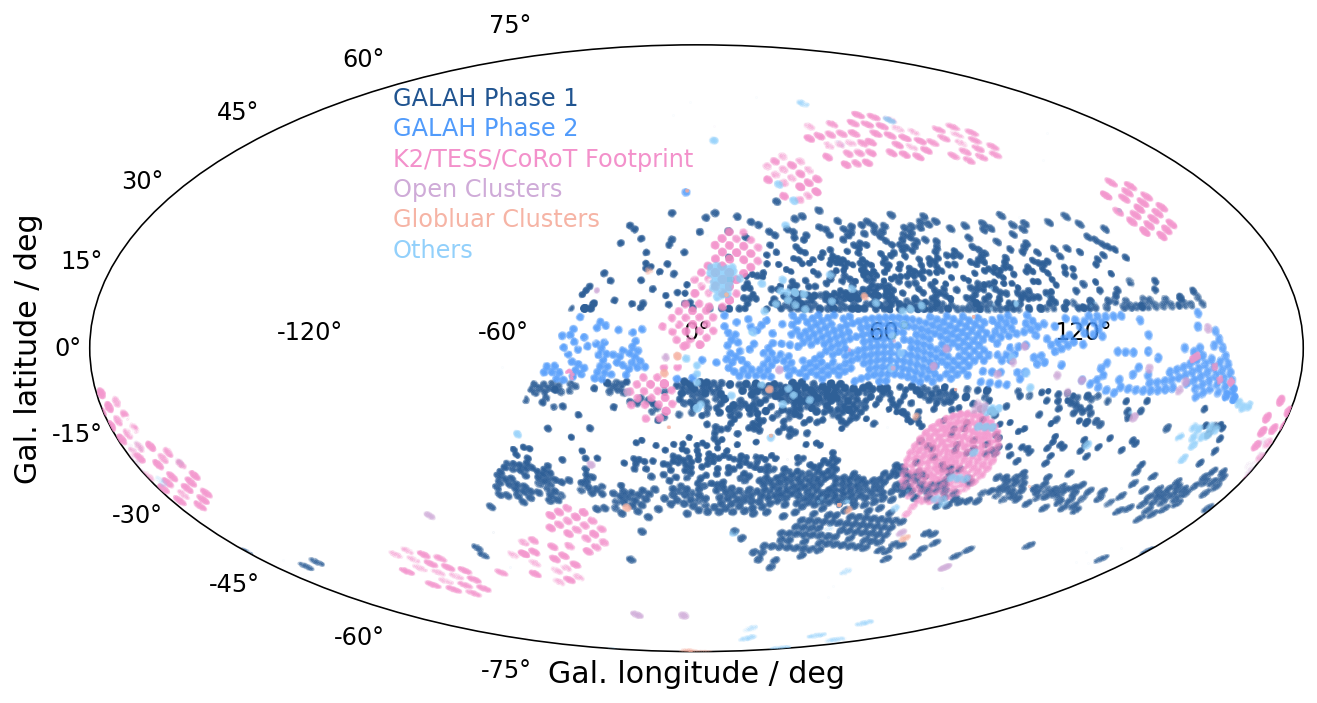

In [101]:
unique_surveys = np.unique(galah_dr4_allstar['survey_name'])

fig = plt.figure(figsize=(11,5))
ax = fig.add_subplot(111, projection='aitoff')

survey_colors = ['#205490','#519BFB','#F391CB','#CFABD8','#F6B4A5','#92D0FB']

survey_labels = ['GALAH Phase 1','GALAH Phase 2','K2/TESS/CoRoT Footprint','Open Clusters','Globluar Clusters','Others']

for unique_survey in unique_surveys:
    
    use = (galah_dr4_allstar['survey_name'] == unique_survey)

    if unique_survey in ['galah_bright','galah_main','galah_faint']:
        
        survey_color = survey_colors[0]
        survey_label = survey_labels[0]
        survey_zorder = 1
        
    elif unique_survey == 'galah_phase2':
        
        survey_color = survey_colors[1]
        survey_label = survey_labels[1]
        survey_zorder = 2

    elif unique_survey in ['tess_hermes','k2_hermes','corot']:
        
        survey_color = survey_colors[2]
        survey_label = survey_labels[2]
        survey_zorder = 3

    elif unique_survey in ['Alessi_13','Berkeley_32','Berkeley_33','Berkeley_73','Blanco_1','Collinder_135','Collinder_140','Collinder_261','IC_2391','IC_2395','IC_2602','IC_4665','Melotte_22','Melotte_25','NGC_1252','NGC_2204','NGC_2232','NGC_2451','NGC_2516','NGC_2682','NGC_3293_NGC_3324','NGC_5617_Trumpl22','NGC_6253','NGC_6583','NGC_6994','NGC_7772','NGC_7826','Ruprecht_147','Trumpler_10','Trumpler_20']:

        survey_color = survey_colors[3]
        survey_label = survey_labels[3]
        survey_zorder = 5

    elif unique_survey in ['E_3','NGC_104_47Tuc','NGC_1261','NGC_1851','NGC_2808','NGC_288','NGC_3201','NGC_362','NGC_5139_oCen','NGC_5904_M_5','NGC_6121_M_4','NGC_6254_M_10','NGC_6397','NGC_6544','NGC_6656_M_22','NGC_6752','NGC_6809_M_55','NGC_7099']:

        survey_color = survey_colors[4]
        survey_label = survey_labels[4]
        survey_zorder = 6
    
    else:
        
        survey_color = survey_colors[5]
        survey_label = survey_labels[5]
        survey_zorder = 4

    s1=ax.scatter(
        -galah_dr4_l[use],
        galah_dr4_b[use],
        c = survey_color,
        rasterized=True,
        alpha = 0.1,
        s = 0.05,
        zorder = survey_zorder
    )
    

for survey_index in range(len(survey_labels)):
    
    ax.text(
        0.25,0.9-0.05*survey_index,
        survey_labels[survey_index],
        color=survey_colors[survey_index],transform=ax.transAxes,ha='left',
        fontsize=12
    )

# make everything transparent
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)

# Set ticks, labels, and spine colors to white
ax.set_xticks([-2,-1,0,1,2], fontsize=20, zorder=7)
ax.tick_params(colors='white', labelsize=12, zorder=7)
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.set_xlabel('Gal. longitude / deg',fontsize=15, color='white')
ax.set_ylabel('Gal. latitude / deg',fontsize=15, color='white')
plt.tight_layout()
plt.savefig('figures/galah_dr4_skymap_transparent.png',dpi=300,bbox_inches='tight')

# Set ticks, labels, and spine colors to white
ax.tick_params(colors='k', labelsize=12, zorder=7)
ax.xaxis.label.set_color('k')
ax.yaxis.label.set_color('white')
ax.set_xlabel('Gal. longitude / deg',fontsize=15, color='k')
ax.set_ylabel('Gal. latitude / deg',fontsize=15, color='k')
plt.tight_layout()
plt.savefig('figures/galah_dr4_skymap_standalone.png',dpi=300,bbox_inches='tight')

plt.show()
plt.close()

### SNR distribution and change wrt. DR3

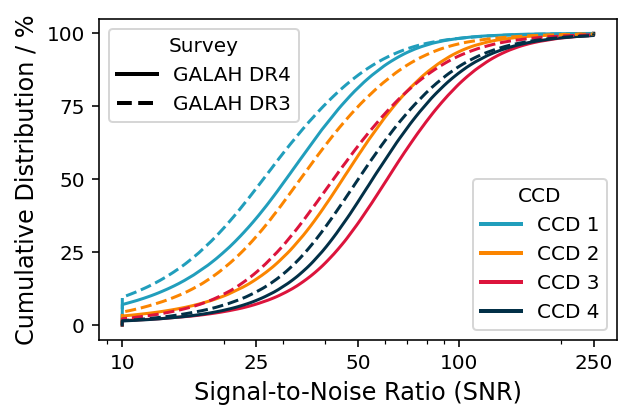

In [166]:
import matplotlib.pyplot as plt
import numpy as np

# Setup figure and axis
f, ax = plt.subplots(1,1,figsize=(4.5,3))

# Function to compute and plot CDF
def plot_cdf(ax, data, label, color, dashed=False):
    sorted_data = np.sort(data[np.isfinite(data)])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    if dashed:
        ax.plot(sorted_data, cdf, c=color, ls='dashed')
    else:
        ax.plot(sorted_data, cdf, c=color)

# Define the SNR limits and colors
snr_min = 10
snr_max = 250
colors = ['#219ebc','#fb8500','crimson','#023047']

# Plot the CDFs for each CCD for GALAH DR4 (solid lines)
plot_cdf(ax, galah_dr4_allstar['snr_px_ccd1'].clip(min=snr_min,max=snr_max), label='CCD 1', color=colors[0])
plot_cdf(ax, galah_dr4_allstar['snr_px_ccd2'].clip(min=snr_min,max=snr_max), label='CCD 2', color=colors[1])
plot_cdf(ax, galah_dr4_allstar['snr_px_ccd3'].clip(min=snr_min,max=snr_max), label='CCD 3', color=colors[2])
plot_cdf(ax, galah_dr4_allstar['snr_px_ccd4'].clip(min=snr_min,max=snr_max), label='CCD 4', color=colors[3])

# Plot the CDFs for each CCD for GALAH DR3 (dashed lines)
plot_cdf(ax, galah_dr3_allstar['snr_c1_iraf'].clip(min=snr_min,max=snr_max), label='CCD 1', color=colors[0], dashed=True)
plot_cdf(ax, galah_dr3_allstar['snr_c2_iraf'].clip(min=snr_min,max=snr_max), label='CCD 2', color=colors[1], dashed=True)
plot_cdf(ax, galah_dr3_allstar['snr_c3_iraf'].clip(min=snr_min,max=snr_max), label='CCD 3', color=colors[2], dashed=True)
plot_cdf(ax, galah_dr3_allstar['snr_c4_iraf'].clip(min=snr_min,max=snr_max), label='CCD 4', color=colors[3], dashed=True)

# Set x-axis to log scale and add custom ticks
ax.set_xscale('log')
ax.set_xticks([10, 25, 50, 100, 250])
ax.set_yticks([0,0.25,0.5,0.75,1.0],[0,25,50,75,100])
ax.set_ylabel('Cumulative Distribution / %', fontsize=12)
ax.set_xlabel('Signal-to-Noise Ratio (SNR)', fontsize=12)

ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Second legend for the line styles (GALAH DR4 vs DR3)
line_style_legend = [
    plt.Line2D([0], [0], color='k', lw=2, linestyle='-'),
    plt.Line2D([0], [0], color='k', lw=2, linestyle='--')
]
ax.add_artist(ax.legend(line_style_legend, ['GALAH DR4', 'GALAH DR3'], title="Survey", loc='upper left'))

# Create two legends
# First legend for the colors (CCD 1-4)
color_legend = [plt.Line2D([0], [0], color=colors[i], lw=2) for i in range(4)]
ax.legend(color_legend, ['CCD 1', 'CCD 2', 'CCD 3', 'CCD 4'], title="CCD", loc='lower right')

# Show plot with tight layout
plt.tight_layout()
plt.savefig('figures/snr_distribution.pdf',dpi=200,bbox_inches='tight')

plt.show()


## Spectrum analysis

In [184]:
computation_time_allspec_percentile = np.array(np.round(np.percentile(galah_dr4_allspec['comp_time'][np.isfinite(galah_dr4_allspec['comp_time'])], q=[16,50,84]),0),dtype=int)
computation_time_allstar_percentile = np.array(np.round(np.percentile(galah_dr4_allstar['comp_time'][np.isfinite(galah_dr4_allstar['comp_time'])], q=[16,50,84]),0),dtype=int)

print(
    r'$'+str(computation_time_allspec_percentile[1])+
    r'_{-'+str(computation_time_allspec_percentile[1]-computation_time_allspec_percentile[0])+
    r'}^{+'+str(computation_time_allspec_percentile[2]-computation_time_allspec_percentile[1])+'}\,\mathrm{s}$'
)

print(
    r'$'+str(computation_time_allstar_percentile[1])+
    r'_{-'+str(computation_time_allstar_percentile[1]-computation_time_allstar_percentile[0])+
    r'}^{+'+str(computation_time_allstar_percentile[2]-computation_time_allstar_percentile[1])+'}\,\mathrm{s}$'
)


$89_{-29}^{+77}\,\mathrm{s}$
$125_{-33}^{+81}\,\mathrm{s}$


In [173]:
galah_dr4_allspec['comp_time']

66.57311
70.718414
248.43323
125.496025
168.23871
74.97063
142.57709
96.63997
91.95447
...
127.96509


## Flag_SP

In [ ]:
dr4_allstar_total = len(dr4_allstar)
dr4_allspec_total = len(dr4_allspec)

dr4_allstar_total, dr4_allspec_total

In [ ]:
import pickle
a_file = open("../spectrum_post_processing/final_flag_sp_dictionary.pkl", "rb")
flag_sp_dictionary = pickle.load(a_file)
a_file.close()
flag_sp_dictionary

In [ ]:
# File path to save the LaTeX file
file_path = '../galah_dr4_paper/tables/flag_sp_statistics.tex'

# Create and write the LaTeX content for the MNRAS table
with open(file_path, 'w') as f:
    f.write(r'\begin{table}[ht]' + '\n')
    f.write(r'\centering' + '\n')
    f.write(r'\caption{List of major quality flag \texttt{flag\_sp} listing the bit, description and how often the flag was raised for the \textit{allstar} and \textit{allspec} routines. Notes: Multiple bits can be raised for each of the 1\,085\,520 spectra spectra of the  of 917\,588 stars.}' + '\n')
    f.write(r'\label{tab:flag_sp}' + '\n')
    f.write(r'\begin{tabular}{ccccc}' + '\n')
    f.write(r'\hline \hline' + '\n')
    f.write(r'Raised Bit & Flag & Description & \textit{allstar} & \textit{allspec} \\' + '\n')
    f.write(r'\hline' + '\n')
    
    f.write(r'  & 0 & No flag & '+str(len(np.where(dr4_allspec['flag_sp']==0)[0]))+r' & '+str(len(np.where(dr4_allstar['flag_sp']==0)[0]))+r' \\'+' \n')
    
    for flag in np.arange(15):
        if flag == 0:  text = 'Emission'
        if flag == 1:  text = 'CCD missing'
        if flag == 2:  text = 'Spectr. Binary 1'
        if flag == 3:  text = 'Spectr. Binary 2'
        if flag == 4:  text = r'$\chi^2 > 3\sigma$'
        if flag == 5:  text = r'\vsini warning'
        if flag == 6:  text = r'\vmic warning'
        if flag == 7:  text = 'Triple Binary warning'
        if flag == 8:  text = r'\Teff warning'
        if flag == 9:  text = r'\logg warning'
        if flag == 10: text = r'\feh warning'
        if flag == 11: text = 'S/N low'
        if flag == 12: text = 'Not converged'
        if flag == 13: text = 'Model extrapolated'
        if flag == 14: text = 'No Results'
            
#         check = np.where((dr4_allspec['flag_sp'] & 2**flag) != 0)[0]
#         print(flag, 2**flag, dr4_allspec['flag_sp'][check])

        raised_in_allspec = str(len(np.where((dr4_allspec['flag_sp'] & 2**flag) != 0)[0]))
        raised_in_allstar = str(len(np.where((dr4_allstar['flag_sp'] & 2**flag) != 0)[0]))

        f.write(str(flag)+r' & '+str(2**flag)+' & '+text+' & '+ raised_in_allspec + ' & '+ raised_in_allstar +r' \\' + '\n')
                
    # End the table
    f.write(r'\hline' + '\n')
    f.write(r'\end{tabular}' + '\n')
    f.write(r'\end{table}')

## Zero Point shifts

In [ ]:
zeropoints.keys()

In [ ]:
zeropoints = Table.read('../catalogs/galah_dr4_zeropoints_240705.fits')

rows = len(zeropoints)

    
    
# File path to save the LaTeX file
file_path = '../galah_dr4_paper/tables/zeropoints_allstar.tex'

# Create and write the LaTeX content for the MNRAS table
with open(file_path, 'w') as f:
    f.write(r'\begin{table}[ht]' + '\n')
    f.write(r'\centering' + '\n')
    f.write(r'\caption{Zero point corrections applied to the \texttt{allstar} measurements. We used \citet{Prsa2016} as reference for Solar parameters and \citet{Grevesse2007} as reference for Solar abundances.}' + '\n')
    f.write(r'\label{tab:zeropoints}' + '\n')
    f.write(r'\begin{tabular}{cccccc}' + '\n')
    f.write(r'\hline \hline' + '\n')
    f.write(r'Proporty & Reference & Zeropoint & Shift & Vesta & Vesta Shift \\' + '\n')
    f.write(r'\hline' + '\n')
    
    for row in range(rows):
        label = str(zeropoints['label'][row])
        if label == 'teff':
            label = r'\Teff'
        if label == 'logg':
            label = r'\logg'
        if label == 'fe_h':
            label = r'\feh'
        if label == 'vmic':
            label = r'\vmic'
        if label == 'vsini':
            label = r'\vsini'
        if label[:2] == 'a_':
            if len(label) > 3:
                label = r'A('+label[2].upper()+label[3]+')'
            else:
                label = r'A('+label[2].upper()+')'
        f.write(label+r' & '+str(zeropoints['solar_G07'][row])+' & '+str(zeropoints['zeropt_allstar'][row])+' & '+str(zeropoints['shift_allstar'][row])+' & '+str(zeropoints['vesta_allstar'][row])+' & '+str(zeropoints['d_vesta_allstar'][row])+r' \\' + '\n')
                
    # End the table
    f.write(r'\hline' + '\n')
    f.write(r'\end{tabular}' + '\n')
    f.write(r'\end{table}')


In [ ]:
from scipy.stats import binned_statistic_2d

f, gs = plt.subplots(1,3,figsize=(10,3.5))

useful = (
    (dr4_allstar['flag_sp'] == 0) &
    (dr4_allstar['flag_c_fe'] == 0) &
    (dr4_allstar['flag_n_fe'] == 0) &
    np.isfinite(dr4_allstar['mass'])
)

ax = gs[0]
ax.set_xlabel('Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
ax.set_ylabel('GALAH DR4 [C/N]',fontsize=15)
h = ax.hist2d(
    dr4_allstar['mass'][useful],
    dr4_allstar['c_fe'][useful] - dr4_allstar['n_fe'][useful],
    bins = (np.linspace(0.5,3.5,100),np.linspace(-1,1,100)),
    norm = LogNorm(),
    cmap = 'plasma'
);
cbar = plt.colorbar(h[-1],ax=ax, orientation = 'horizontal',pad=0.2)
cbar.set_label('Nr. Stars',fontsize=15)

# Second panel: 2D histogram (binned stats) colored by median
bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
    dr4_allstar['teff'][useful],
    dr4_allstar['logg'][useful],
    dr4_allstar['mass'][useful],
    statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
)

ax = gs[1]
ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
                   extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                   cmap='RdYlBu',vmin = 0.75, vmax = 2.5)
cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
cbar.set_label('Median Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
ax.invert_xaxis()
ax.invert_yaxis()


# Second panel: 2D histogram (binned stats) colored by median
bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
    dr4_allstar['teff'][useful],
    dr4_allstar['logg'][useful],
    dr4_allstar['c_fe'][useful] - dr4_allstar['n_fe'][useful],
    statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
)

ax = gs[2]
ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
                   extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
                   cmap='RdYlBu', vmin = -0.5, vmax = 0.25)
cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
cbar.set_label('Median GALAH DR4 [C/N]',fontsize=15)
ax.invert_xaxis()
ax.invert_yaxis()

plt.tight_layout()
plt.savefig('../galah_dr4_paper/figures/cn_mass.png',dpi=200,bbox_inches='tight')

In [ ]:
from scipy.stats import binned_statistic_2d

f, gs = plt.subplots(1,3,figsize=(10,3.5))

useful = (
    (dr4_allstar['flag_sp'] == 0) &
    (dr4_allstar['flag_c_fe'] == 0) &
    (dr4_allstar['flag_n_fe'] == 0) &
    np.isfinite(dr4_allstar['age'])
)

ax = gs[0]
ax.set_xlabel('Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
ax.set_ylabel('GALAH DR4 [C/N]',fontsize=15)
h = ax.hist2d(
    np.log10(dr4_allstar['age'][useful]*10**9),
    dr4_allstar['c_fe'][useful] - dr4_allstar['n_fe'][useful],
    bins = (np.linspace(8.2,10.2,100),np.linspace(-1,1,100)),
    norm = LogNorm(),
    cmap = 'plasma'
);
cbar = plt.colorbar(h[-1],ax=ax, orientation = 'horizontal',pad=0.2)
cbar.set_label('Nr. Stars',fontsize=15)

# # Second panel: 2D histogram (binned stats) colored by median
# bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
#     dr4_allstar['teff'][useful],
#     dr4_allstar['logg'][useful],
#     dr4_allstar['age'][useful],
#     statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
# )

# ax = gs[1]
# ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
# ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

# im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
#                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
#                    cmap='RdYlBu',vmin = 0.75, vmax = 2.5)
# cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
# cbar.set_label('Median Isochrone Mass / $\mathrm{M_\odot}$',fontsize=15)
# ax.invert_xaxis()
# ax.invert_yaxis()


# # Second panel: 2D histogram (binned stats) colored by median
# bin_stat_mean, xedges, yedges, binnumber = binned_statistic_2d(
#     dr4_allstar['teff'][useful],
#     dr4_allstar['logg'][useful],
#     dr4_allstar['c_fe'][useful] - dr4_allstar['n_fe'][useful],
#     statistic='median', bins=(np.linspace(3250,6000,100),np.linspace(-0.25,4.25,100))
# )

# ax = gs[2]
# ax.set_xlabel('GALAH DR4 $T_\mathrm{eff}~/~\mathrm{K}$',fontsize=15)
# ax.set_ylabel('GALAH DR4 $\log g$',fontsize=15)

# im = ax.imshow(bin_stat_mean.T, origin='lower', aspect='auto',
#                    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
#                    cmap='RdYlBu', vmin = -0.5, vmax = 0.25)
# cbar = plt.colorbar(im, ax=ax, orientation = 'horizontal',pad=0.2, extend='both')
# cbar.set_label('Median GALAH DR4 [C/N]',fontsize=15)
# ax.invert_xaxis()
# ax.invert_yaxis()

# plt.tight_layout()
# plt.savefig('../galah_dr4_paper/figures/cn_mass.png',dpi=200,bbox_inches='tight')

## Dynamic overview

In [194]:
import galpy
#from galpy.potential import MWPotential2014 as pot
from galpy.potential.mwpotentials import McMillan17 as pot
from galpy.actionAngle import actionAngleStaeckel, actionAngleSpherical
from galpy.orbit import Orbit

# Reference values
#r_galactic_centre = 8.178*u.kpc # Gravity Collaboration, 2019, A&A, 625, 10
r_galactic_centre = 8.21*u.kpc # McMillan Potential, 2017
z_galactic_plane = 25.0*u.pc # Bland-Hawthorn & Gerhard, 2016, ARA&A, 54, 529

print('Reference frame:')
print('R_GC = '+str(r_galactic_centre)+' (McMillan, 2017, MNRAS, 465, 76)')
print('phi_GC = '+str(0*u.rad))
print('z_GC = '+str(z_galactic_plane)+' (Bland-Hawthorn & Gerhard, 2016, ARA&A, 54, 529)')

v_total_sun = (np.tan(6.379*u.mas)*r_galactic_centre/u.yr).to(u.km/u.s) # pm_l by Reid & Brunthaler 2004, ApJ, 616, 872
print('V_total_sun: = '+"{:.2f}".format(v_total_sun)+' (Reid & Brunthaler 2004, ApJ, 616, 872)')
v_peculiar = [11.1, 15.17, 7.25]*u.km/u.s # U and W from Schoenrich, Binney, Dehnen, 2010, MNRAS, 403, 1829, V so that V = V_total-V_sun
print('V_peculiar = ',(v_peculiar),' (U and W from Schoenrich, Binney, Dehnen, 2010, MNRAS, 403, 1829)')
print('V-component of V_peculiar = 15.17 km/s, instead of 12.24 km/s by Schoenrich et al. (2010), for matching v_circular')
v_circular = np.round(v_total_sun-v_peculiar[1],1)
print('V_circular = ',"{:.2f}".format(v_circular),' (McMillan, 2017, MNRAS, 465, 76)')

aAS = actionAngleStaeckel(
        pot   = pot,        #potential                                                                                                                                                                      
        delta = 0.45,       #focal length of confocal coordinate system                                                                                                                            
        c     = True        #use C code (for speed)                                                                                                                                                         
        )

# #(RA = 17:45:37.224 h:m:s, Dec = −28:56:10.23 deg) (Reid& Brunthaler 2004)

Reference frame:
R_GC = 8.21 kpc (McMillan, 2017, MNRAS, 465, 76)
phi_GC = 0.0 rad
z_GC = 25.0 pc (Bland-Hawthorn & Gerhard, 2016, ARA&A, 54, 529)
V_total_sun: = 248.27 km / s (Reid & Brunthaler 2004, ApJ, 616, 872)
V_peculiar =  [11.1  15.17  7.25] km / s  (U and W from Schoenrich, Binney, Dehnen, 2010, MNRAS, 403, 1829)
V-component of V_peculiar = 15.17 km/s, instead of 12.24 km/s by Schoenrich et al. (2010), for matching v_circular
V_circular =  233.10 km / s  (McMillan, 2017, MNRAS, 465, 76)


In [195]:
calculate_sun = True

if calculate_sun:
    sun = dict()

    # Create the Orbit instance
    o = Orbit(
        #ra, dec, dist, pm_ra, pm_dec, v_los
        vxvv=[0.*u.deg,0.*u.deg,0.*u.kpc,0.*u.mas/u.yr, 0.*u.mas/u.yr,0.*u.km/u.s],
        ro=r_galactic_centre,
        vo=v_circular,
        zo=z_galactic_plane,
        solarmotion=[-11.1, 15.17, 7.25]*u.km/u.s,
        #solarmotion='schoenrich',
        radec=True
    )

    #Galactocentric coordinates:
    sun['X_XYZ'] = o.helioX()#*u.kpc        
    sun['Y_XYZ'] = o.helioY()#*u.kpc
    sun['Z_XYZ'] = o.helioZ()#*u.kpc
    sun['U_UVW'] = o.U()#*u.km/u.s
    sun['V_UVW'] = o.V()#*u.km/u.s
    sun['W_UVW'] = o.W()#*u.km/u.s
    sun['R_Rzphi'] = o.R()#*u.kpc
    sun['phi_Rzphi'] = o.phi()#*u.rad
    sun['z_Rzphi'] = o.z()#*u.kpc
    sun['vR_Rzphi'] = o.vR()#*u.km/u.s
    sun['vT_Rzphi'] = o.vT()#*u.km/u.s        
    sun['vz_Rzphi'] = o.vz()#*u.km/u.s

    try:
        sun['J_R'], sun['L_Z'],sun['J_Z'], sun['omega_R'], sun['omega_phi'], sun['omega_z'], sun['angle_R'], sun['angle_phi'], sun['angle_z'] = aAS.actionsFreqsAngles(
            #R,vR,vT,z,vz[,phi]
            sun['R_Rzphi']*u.kpc,
            sun['vR_Rzphi']*u.km/u.s,
            sun['vT_Rzphi']*u.km/u.s,
            sun['z_Rzphi']*u.kpc,
            sun['vz_Rzphi']*u.km/u.s,
            sun['phi_Rzphi']*u.rad,
            ro=r_galactic_centre,vo=v_circular
        )
    except:
        sun['omega_R'] = [np.nan]
        sun['omega_phi'] = [np.nan]
        sun['omega_z'] = [np.nan]
        sun['angle_R'] = [np.nan]
        sun['angle_phi'] = [np.nan]
        sun['angle_z'] = [np.nan]
        try:
            sun['J_R'], sun['L_Z'],sun['J_Z'] = aAS(
            #R,vR,vT,z,vz[,phi]
            sun['R_Rzphi']*u.kpc,
            sun['vR_Rzphi']*u.km/u.s,
            sun['vT_Rzphi']*u.km/u.s,
            sun['z_Rzphi']*u.kpc,
            sun['vz_Rzphi']*u.km/u.s,
            sun['phi_Rzphi']*u.rad,
            ro=r_galactic_centre,vo=v_circular
        )
        except:
            sun['J_R'] = [np.nan]
            sun['L_Z'] = [np.nan]
            sun['J_Z'] = [np.nan]

    try:
        sun['ecc'], sun['zmax'], sun['R_peri'], sun['R_ap'] = aAS.EccZmaxRperiRap(
            #R,vR,vT,z,vz[,phi]
            sun['R_Rzphi']*u.kpc,
            sun['vR_Rzphi']*u.km/u.s,
            sun['vT_Rzphi']*u.km/u.s,
            sun['z_Rzphi']*u.kpc,
            sun['vz_Rzphi']*u.km/u.s,
            sun['phi_Rzphi']*u.rad,
            ro=r_galactic_centre,vo=v_circular
        )         
        sun['zmax']
        sun['R_peri']
        sun['R_peri']

    except:
        sun['ecc'] = [np.nan]
        sun['zmax'] = [np.nan]
        sun['R_peri'] = [np.nan]
        sun['R_ap'] = [np.nan]

    sun['Energy'] = o.E(pot=pot,ro=r_galactic_centre,vo=v_circular,zo=z_galactic_plane)

    print('Solar values:')
    print('X,Y,Z: '+"{:.2f}".format(sun['X_XYZ'])+' '+"{:.2f}".format(sun['Y_XYZ'])+' '+"{:.2f}".format(sun['Z_XYZ']))
    print('U,V,W: '+"{:.2f}".format(sun['U_UVW'])+' '+"{:.2f}".format(sun['V_UVW'])+' '+"{:.2f}".format(sun['W_UVW']))
    print('R,phi,z: '+"{:.2f}".format(sun['R_Rzphi'])+' '+"{:.2f}".format(sun['phi_Rzphi'])+' '+"{:.2f}".format(sun['z_Rzphi']))
    print('vR,vT,vz: '+"{:.2f}".format(sun['vR_Rzphi'])+' '+"{:.2f}".format(sun['vT_Rzphi'])+' '+"{:.2f}".format(sun['vz_Rzphi']))
    print('J_R,L_Z,J_Z: '+"{:.2f}".format(sun['J_R'][0])+' '+"{:.2f}".format(sun['L_Z'][0])+' '+"{:.2f}".format(sun['J_Z'][0]))
    print('Omega R/phi/z: '+"{:.2f}".format(sun['omega_R'][0])+' '+"{:.2f}".format(sun['omega_phi'][0])+' '+"{:.2f}".format(sun['omega_z'][0]))
    print('Angles R/phi/z: '+"{:.2f}".format(sun['angle_R'][0])+' '+"{:.2f}".format(sun['angle_phi'][0])+' '+"{:.2f}".format(sun['angle_z'][0]))
    print('ecc, zmax, R_peri, R_apo: '+"{:.2f}".format(sun['ecc'][0])+' '+"{:.2f}".format(sun['zmax'][0])+' '+"{:.2f}".format(sun['R_peri'][0])+' '+"{:.2f}".format(sun['R_ap'][0]))
    print('Energy: '+"{:.2f}".format(sun['Energy']))

Solar values:
X,Y,Z: -0.00 -0.00 -0.00
U,V,W: 0.00 0.00 0.00
R,phi,z: 8.21 0.00 0.03
vR,vT,vz: -11.10 248.27 7.25
J_R,L_Z,J_Z: 7.73 2038.30 0.37
Omega R/phi/z: 38.00 27.07 68.36
Angles R/phi/z: 5.86 0.05 0.35
ecc, zmax, R_peri, R_apo: 0.07 0.11 8.15 9.43
Energy: -152783.43


In [187]:
galah_dr4_dynamics = Table.read('../catalogs/galah_dr4_vac_dynamics.fits')

In [188]:
gcs = Table.read('../auxiliary_information/VasilievBaumgardt_2021_MNRAS_505_5978_cluster_source_id_memberprob0p7.fits')
gcs['gaiadr3_source_id'] = gcs['source_id']
gcs_dr4 = join(gcs, galah_dr4_dynamics, keys='gaiadr3_source_id')
gcs_dr4 = gcs_dr4[np.isfinite(gcs_dr4['L_Z'])]

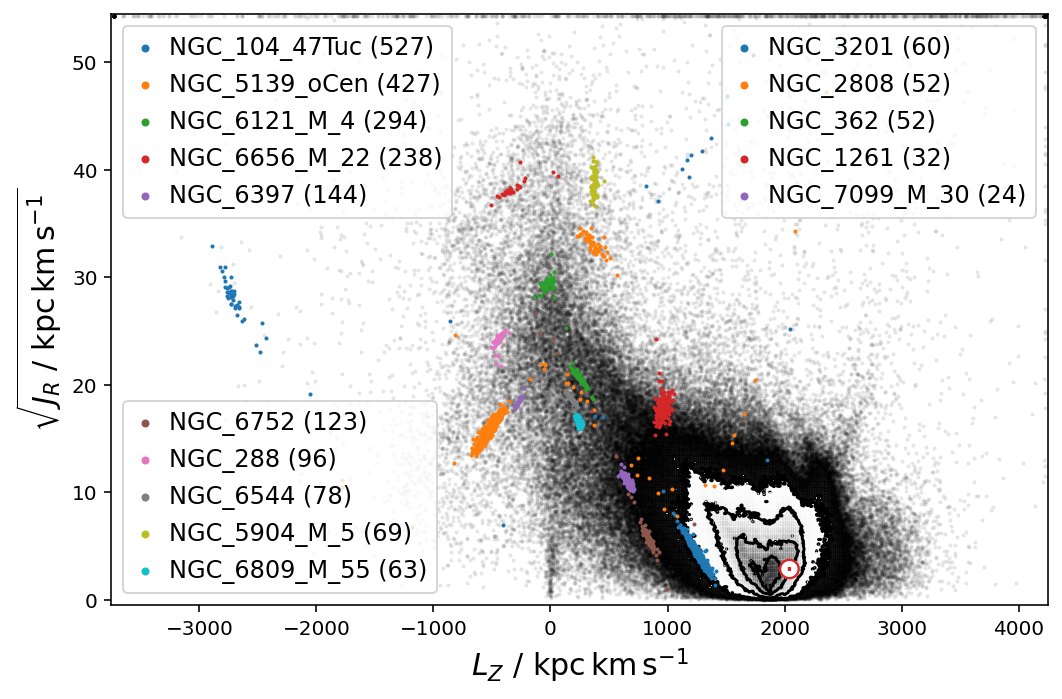

In [237]:
f,ax = plt.subplots(figsize=(7.5,5))

use = np.isfinite(output['L_Z'])
corner.hist2d(
    (galah_dr4_dynamics['L_Z'][use]).clip(min=-3725,max=4225),
    (np.sqrt(galah_dr4_dynamics['J_R'][use])).clip(min=0,max=54.25),
    range = [(-3750,4250),(-0.5,54.5)],
    bins = 500,
    ax=ax,
    zorder=1
)
ax.set_xlabel(r'$L_Z~/~\mathrm{kpc\,km\,s^{-1}}$',fontsize=15)
ax.set_ylabel(r'$\sqrt{J_R~/~\mathrm{kpc\,km\,s^{-1}}}$',fontsize=15)

gcs = Table()
gcs['cluster'], gcs['counts'] = np.unique(gcs_dr4['cluster'],return_counts=True)
gcs.sort('counts',reverse=True)

circle = mpatches.Ellipse((sun['L_Z'][0],np.sqrt(sun['J_R'][0])), 140, 1.6, color='white',fill=True, zorder=3)
ax.add_patch(circle)
ax.text(sun['L_Z'][0]-10,np.sqrt(sun['J_R'][0]), r'$\odot$', fontsize=16, fontweight='bold', ha='center', va='center', color='C3', zorder=4)

scatter_plots = []

nr = 0
for gc in gcs['cluster']:
    in_cluster = (gcs_dr4['cluster'] == gc) & np.isfinite(gcs_dr4['L_Z'])
    if len(gcs_dr4['cluster'][in_cluster]) > 20:
        scatter_plots.append(ax.scatter(
            gcs_dr4['L_Z'][in_cluster],
            np.sqrt(gcs_dr4['J_R'][in_cluster]),
            label = gc + ' ('+str(len(gcs_dr4['cluster'][in_cluster]))+')',
            s = 1, zorder=2
        ))
        nr +=1

scatter_plots_left = scatter_plots[:5]
scatter_plots_left2 = scatter_plots[5:10]
scatter_plots_right = scatter_plots[10:]

# Create legends
legend1 = ax.legend(handles=scatter_plots_left, loc='upper left', fontsize=12, handlelength=1, markerscale = 3, handletextpad=0.5)
ax.add_artist(legend1)
legend2 = ax.legend(handles=scatter_plots_left2, loc='lower left', fontsize=12, handlelength=1, markerscale = 3, handletextpad=0.5)
ax.add_artist(legend2)
legend3 = ax.legend(handles=scatter_plots_right, loc='upper right', fontsize=12, handlelength=1, markerscale = 3, handletextpad=0.5)

plt.tight_layout()
plt.savefig('figures/galah_dr4_lz_jr_with_gcs.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()

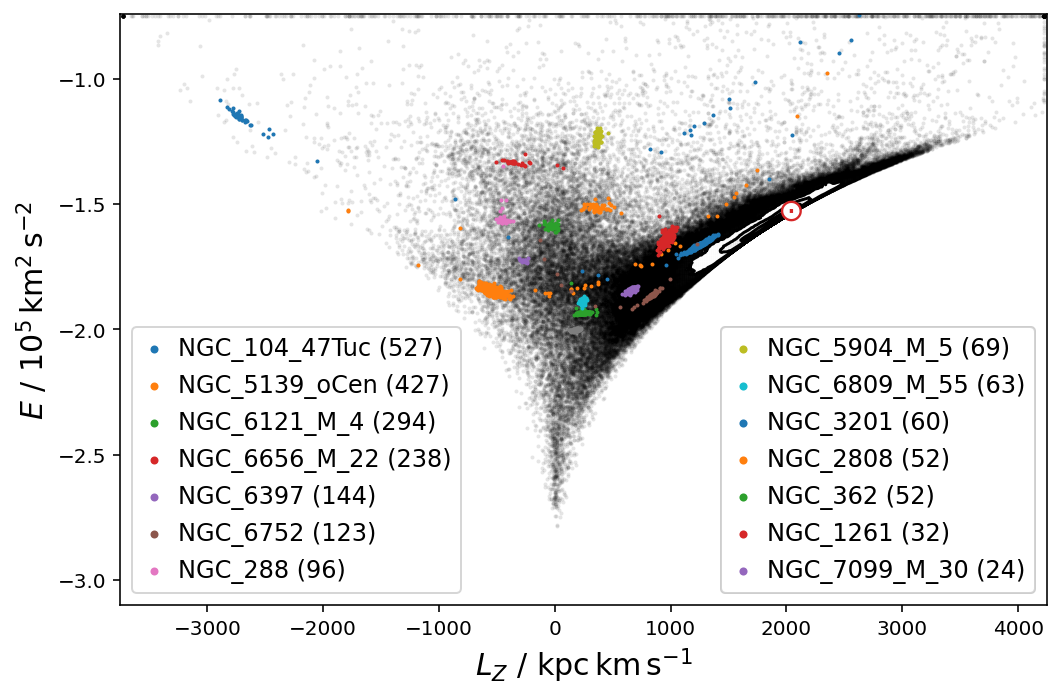

In [249]:
f,ax = plt.subplots(figsize=(7.5,5))

use = np.isfinite(output['Energy'])
corner.hist2d(
    (galah_dr4_dynamics['L_Z'][use]).clip(min=-3725,max=4225),
    (galah_dr4_dynamics['Energy'][use]/10**5).clip(min=-3.0,max=-0.75),
    range = [(-3750,4250),(-3.1,-0.74)],
    bins = 500,
    ax=ax,
    zorder=1
)
ax.set_xlabel(r'$L_Z~/~\mathrm{kpc\,km\,s^{-1}}$',fontsize=15)
ax.set_ylabel(r'$E~/~10^{5}\,\mathrm{km^2\,s^{-2}}$',fontsize=15)

gcs = Table()
gcs['cluster'], gcs['counts'] = np.unique(gcs_dr4['cluster'],return_counts=True)
gcs.sort('counts',reverse=True)

circle = mpatches.Ellipse((sun['L_Z'][0],sun['Energy']/10**5), 140, 0.07, color='white',fill=True, zorder=3)
ax.add_patch(circle)
ax.text(sun['L_Z'][0]-10,sun['Energy']/10**5, r'$\odot$', fontsize=16, fontweight='bold', ha='center', va='center', color='C3', zorder=4)

scatter_plots = []

nr = 0
for gc in gcs['cluster']:
    in_cluster = (gcs_dr4['cluster'] == gc) & np.isfinite(gcs_dr4['L_Z'])
    if len(gcs_dr4['cluster'][in_cluster]) > 20:
        scatter_plots.append(ax.scatter(
            gcs_dr4['L_Z'][in_cluster],
            gcs_dr4['Energy'][in_cluster]/10**5,
            label = gc + ' ('+str(len(gcs_dr4['cluster'][in_cluster]))+')',
            s = 1, zorder=2
        ))
        nr +=1

scatter_plots_left = scatter_plots[:7]
scatter_plots_left2 = scatter_plots[8:]

# Create legends
legend1 = ax.legend(handles=scatter_plots_left, loc='lower left', fontsize=12, handlelength=1, markerscale = 3, handletextpad=0.5)
ax.add_artist(legend1)
legend2 = ax.legend(handles=scatter_plots_left2, loc='lower right', fontsize=12, handlelength=1, markerscale = 3, handletextpad=0.5)
ax.add_artist(legend2)

plt.tight_layout()
plt.savefig('figures/galah_dr4_lz_e_with_gcs.png',dpi=300,bbox_inches='tight')
plt.show()
plt.close()